<a href="https://colab.research.google.com/github/fbudimannn/Data-Management/blob/main/End%20to%20End%20Database%20Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Database of "" Online Ticket Platform ""

# EventsGo Tickets: An Intelligent Ticketing System

## 1. Introduction and Business Context

This project, "EventsGo", involves the design and implementation of a hypothetical intelligent ticketing system. The initiative is set against the backdrop of the rapidly growing global digital ticketing market. It aims to address a key limitation in current ticketing models, which often lack personalization and miss opportunities for targeted sales.

The core purposes of EventsGo are twofold:
* **For Users:** To enhance the user experience by offering personalized event recommendations tailored to individual preferences and booking history.
* **For Organizers:** To provide data-driven insights on audience demographics, venue demand, and engagement, helping them maximize their reach and optimize event planning.

## 2. Database Design and Implementation

### 2.1. Conceptual Design & Normalization

The foundation of the system is a well-structured relational database.

* **Entity Relationship Diagram (ERD):** The design process started with an ERD to conceptualize the mini-world and define the relationships between core components. The system was broken down into independent **focus entities** (e.g., `User`, `Event`, `Bookings`) and dependent **weak entities** (e.g., `Genre`, `Rating`, `Payment Method Type`).

* **Database Normalization:** To improve flexibility, reduce data redundancy, and ensure data integrity, the database was normalized up to the Third Normal Form (3NF).
    * **1NF:** Applied to ensure atomicity. For example, the `address` field was broken down into `Address Line 1`, `City`, and `Postal Code`.
    * **2NF:** Adhered to by using uniquely generated primary keys, ensuring no partial dependencies on composite keys.
    * **3NF:** Achieved by resolving transitive dependencies. For instance, `Payment Method Name` was moved to a separate lookup table linked by `Payment_Method_ID` to remove its dependency on a non-primary key in the bookings table.

### 2.2. Technical Implementation & Data Generation

* **Schema Implementation:** The database schema was built using **SQLite** within a **Google Colab notebook**. Data types were selected strategically, such as `VARCHAR` for unique identifiers and `INTEGER` for numerical values like venue capacity and prices, to optimize storage and facilitate aggregations. A derived `age` attribute was also calculated from the `Date_Of_Birth` field.

* **Synthetic Data Generation:** A multi-tool approach was employed to create a realistic dataset.
    * **Tools:** The process utilized a combination of **Mockaroo, Excel, and ChatGPT**.
    * **Process:** While Mockaroo was used initially, Excel offered better precision for handling data inconsistencies and maintaining relationships between primary and foreign keys using functions like `RANDBETWEEN` and `Xlookup`. ChatGPT assisted in generating authentic information, particularly for the `Venue` table, to enhance the dataset's realism.
    * **Data Loading:** The final datasets, prepared as CSV files, were imported into their respective SQLite tables using a Python script.

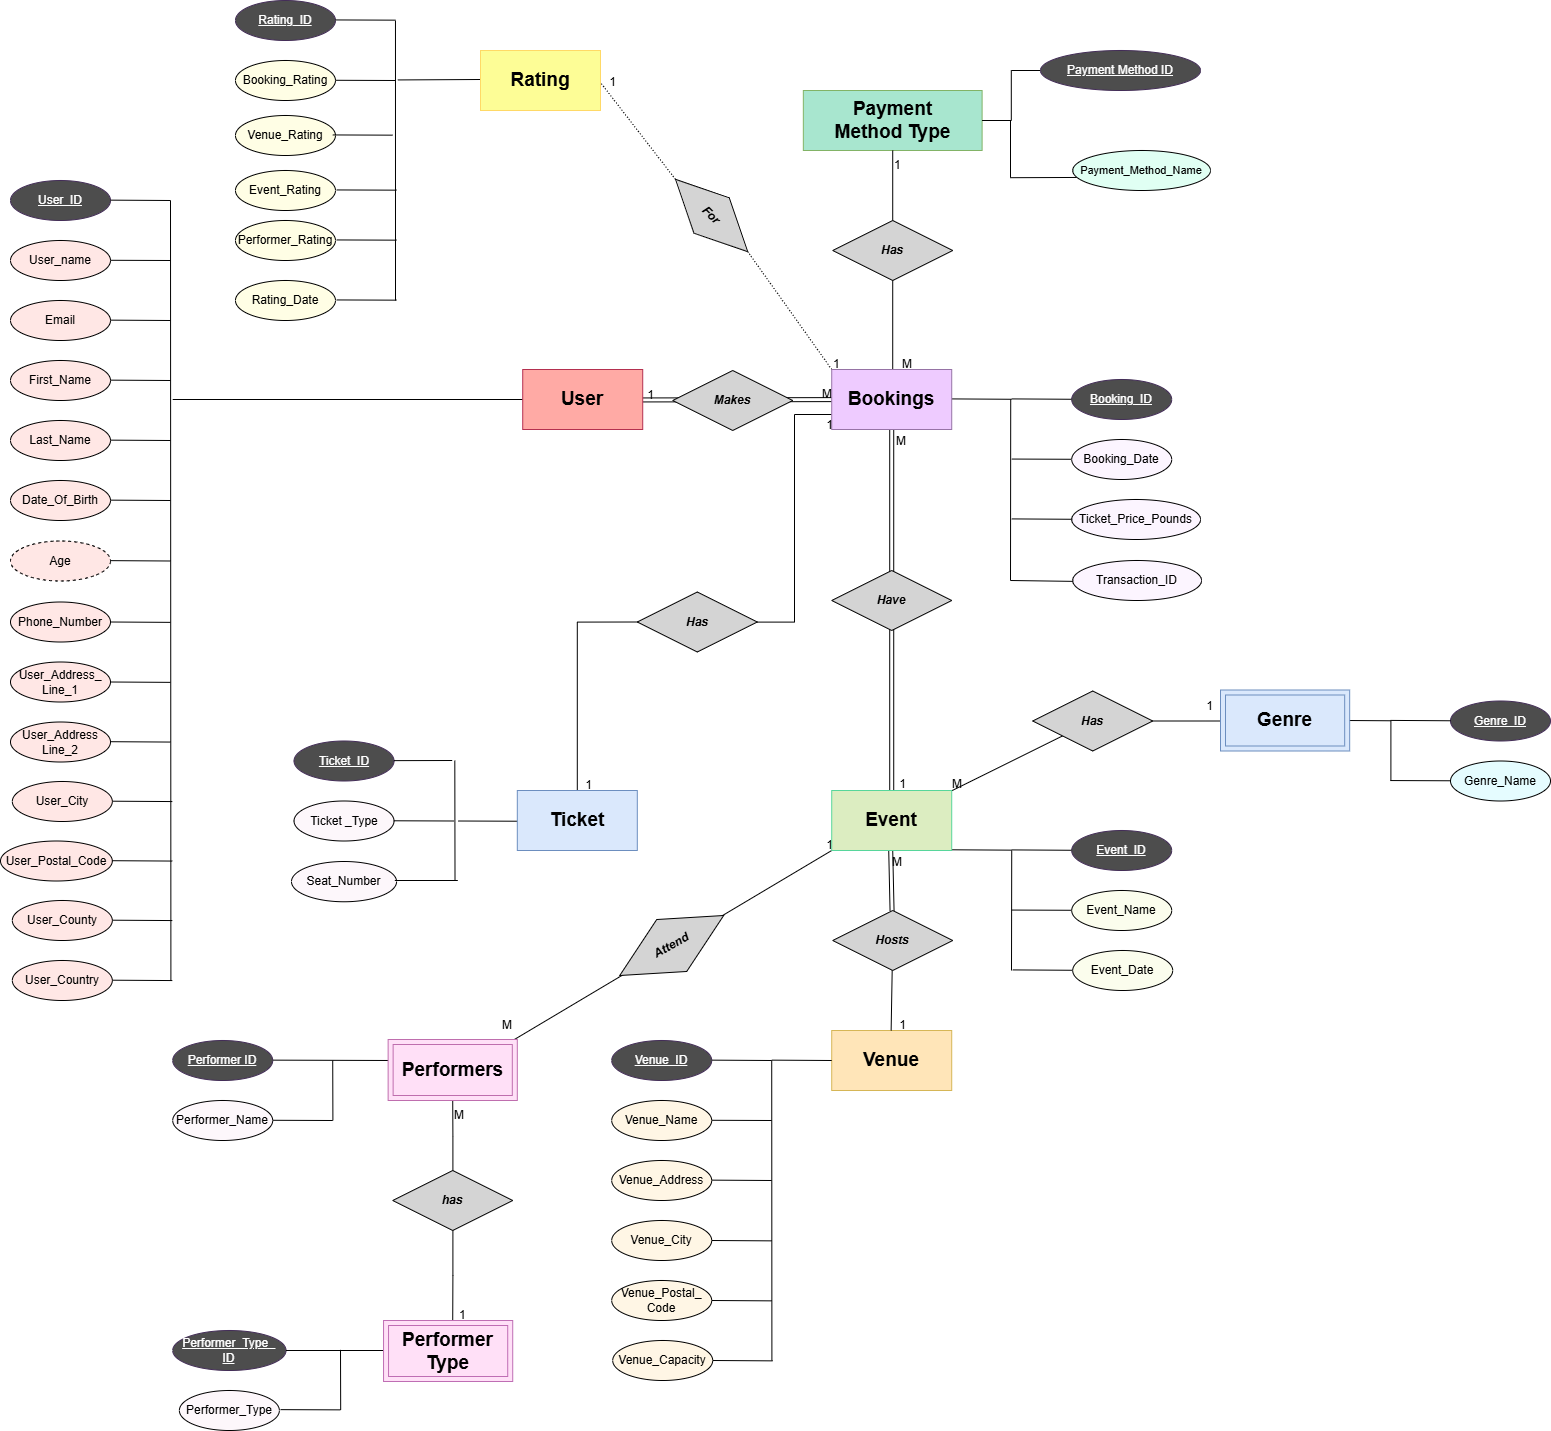

## Creating Schema

In [ ]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('concert_online_ticket_.db')
cursor = conn.cursor()

# User Table
cursor.execute('''
CREATE TABLE User (
    User_ID VARCHAR(500) PRIMARY KEY,
    User_name VARCHAR(50) UNIQUE,
    Email VARCHAR(100) UNIQUE,
    First_Name VARCHAR(50),
    Last_Name VARCHAR(50),
    Date_Of_Birth DATE,
    Phone_Number VARCHAR(15),
    User_Address_Line_1 VARCHAR(255),
    User_Address_Line_2 VARCHAR(255),
    User_City VARCHAR(255),
    User_Postal_Code VARCHAR(20),
    User_County VARCHAR(50),
    User_Country VARCHAR(50)
);
''')

# Bookings Table
cursor.execute('''
CREATE TABLE Bookings (
    Booking_ID VARCHAR(500) PRIMARY KEY,
    Transaction_ID VARCHAR(500),
    Booking_Date DATETIME,
    Ticket_Price_Pounds INTEGER,
    Payment_Method_ID VARCHAR(500),
    User_ID VARCHAR(500),
    Event_ID VARCHAR(500),
    FOREIGN KEY (User_ID) REFERENCES User(User_ID),
    FOREIGN KEY (Event_ID) REFERENCES Event(Event_ID),
    FOREIGN KEY (Payment_Method_ID) REFERENCES Payment_Method_Type(Payment_Method_ID)
);
''')


# Payment Method Type Table
cursor.execute('''
CREATE TABLE Payment_Method_Type (
    Payment_Method_ID VARCHAR(500) PRIMARY KEY,
    Payment_Method_Name VARCHAR(50)
);
''')

# Rating Table
cursor.execute('''
CREATE TABLE Rating (
    Rating_ID VARCHAR(500) PRIMARY KEY,
    Booking_Rating INTEGER,
    Venue_Rating INTEGER,
    Event_Rating INTEGER,
    Performer_Rating INTEGER,
    Rating_Date DATETIME,
    Booking_ID VARCHAR(500),
    FOREIGN KEY (Booking_ID) REFERENCES Bookings(Booking_ID)
);
''')

# Ticket Table
cursor.execute('''
CREATE TABLE Ticket (
    Ticket_ID VARCHAR(500) PRIMARY KEY,
    Ticket_Type VARCHAR(500),
    Seat_Number VARCHAR(500),
    Booking_ID VARCHAR(500),
    FOREIGN KEY (Booking_ID) REFERENCES Bookings(Booking_ID)
);
''')



# Event Table
cursor.execute('''
CREATE TABLE Event (
    Event_ID VARCHAR(500) PRIMARY KEY,
    Event_Name VARCHAR(100),
    Event_Date DATETIME,
    Genre_ID VARCHAR(500),
    Venue_ID VARCHAR(500),
    FOREIGN KEY (Venue_ID) REFERENCES Venue(Venue_ID),
    FOREIGN KEY (Genre_ID) REFERENCES Genre(Genre_ID)

);
''')



# Venue Table
cursor.execute('''
CREATE TABLE Venue (
    Venue_ID VARCHAR(500) PRIMARY KEY,
    Venue_Name VARCHAR(100),
    Venue_Address VARCHAR(255),
    Venue_City VARCHAR(50),
    Venue_Postal_Code VARCHAR(50),
    Venue_Capacity INTEGER
);
''')

# Performers Table
cursor.execute('''
CREATE TABLE Performers (
    Performer_ID VARCHAR(500) PRIMARY KEY,
    Performer_Name VARCHAR(100),
    Performer_Type_ID VARCHAR(500),
    Event_ID VARCHAR(500),
    FOREIGN KEY (Performer_Type_ID) REFERENCES Performer_Type(Performer_Type_ID),
    FOREIGN KEY (Event_ID) REFERENCES Event(Event_ID)
);
''')

# Performer Type Table
cursor.execute('''
CREATE TABLE Performer_Type (
    Performer_Type_ID VARCHAR(500) PRIMARY KEY,
    Performer_Type VARCHAR(50)
);
''')

# Genre Table
cursor.execute('''
CREATE TABLE Genre (
    Genre_ID VARCHAR(500) PRIMARY KEY,
    Genre_Name VARCHAR(50)
);
''')


conn.commit()

print("Database and tables created successfully!")


Database and tables created successfully!


In [ ]:
#Check if the tables are created

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

for table_name in tables:
    print(f"Table: {table_name[0]}")
    cursor.execute(f"PRAGMA table_info({table_name[0]});")
    columns = cursor.fetchall()
    for col in columns:
        print(f"  Column: {col[1]}, Type: {col[2]}, NotNull: {col[3]}, DefaultVal: {col[4]}, PrimaryKey: {col[5]}")
    print("-" * 20)



Table: User
  Column: User_ID, Type: VARCHAR(500), NotNull: 0, DefaultVal: None, PrimaryKey: 1
  Column: User_name, Type: VARCHAR(50), NotNull: 0, DefaultVal: None, PrimaryKey: 0
  Column: Email, Type: VARCHAR(100), NotNull: 0, DefaultVal: None, PrimaryKey: 0
  Column: First_Name, Type: VARCHAR(50), NotNull: 0, DefaultVal: None, PrimaryKey: 0
  Column: Last_Name, Type: VARCHAR(50), NotNull: 0, DefaultVal: None, PrimaryKey: 0
  Column: Date_Of_Birth, Type: DATE, NotNull: 0, DefaultVal: None, PrimaryKey: 0
  Column: Phone_Number, Type: VARCHAR(15), NotNull: 0, DefaultVal: None, PrimaryKey: 0
  Column: User_Address_Line_1, Type: VARCHAR(255), NotNull: 0, DefaultVal: None, PrimaryKey: 0
  Column: User_Address_Line_2, Type: VARCHAR(255), NotNull: 0, DefaultVal: None, PrimaryKey: 0
  Column: User_City, Type: VARCHAR(255), NotNull: 0, DefaultVal: None, PrimaryKey: 0
  Column: User_Postal_Code, Type: VARCHAR(20), NotNull: 0, DefaultVal: None, PrimaryKey: 0
  Column: User_County, Type: VARCHAR(

In [ ]:
# Here the final datasets have already been uploaded to google drive
import csv

# Function to download and save CSV from Google Drive
def load_google_drive_csv(sheet_url, file_name):
    sheet_url_replace = 'https://drive.google.com/uc?id=' + sheet_url.split('/')[-2]
    df = pd.read_csv(sheet_url_replace)
    df.to_csv(file_name, index=False)  # Save CSV locally
    return file_name  # Return filename

# Load and save datasets
User = load_google_drive_csv('https://drive.google.com/file/d/1Y8-lb2gguinqeKfyxtW-qKQ0hobRx6Yd/view?usp=drive_link', 'User.csv')
Bookings = load_google_drive_csv('https://drive.google.com/file/d/1xXRz-BN3IDEZ-mKZcGFr-OYsseMCP6KA/view?usp=sharing', 'Bookings.csv')
Event = load_google_drive_csv('https://drive.google.com/file/d/1mBzql1xozOhCIuFU7ecqQez7ywZLTvsL/view?usp=sharing', 'Event.csv')
Genre = load_google_drive_csv('https://drive.google.com/file/d/1AOp2kepXdGGEax3gm0UpAVUxvBzG0L7n/view?usp=drive_link', 'Genre.csv')
Venue = load_google_drive_csv('https://drive.google.com/file/d/15DDPaQYH5LI3br5BS6NGtLiZx3SGexMU/view?usp=drive_link', 'Venue.csv')
Ticket= load_google_drive_csv('https://drive.google.com/file/d/1BDTFij7sqQITvjPRwZFLabOo5hRsafl9/view?usp=drive_link', 'Ticket.csv')
Payment_Method_Type = load_google_drive_csv('https://drive.google.com/file/d/13l815R5wDlG4wgTd7Weq6PY95TPO0NDT/view?usp=drive_link', 'Payment_Method_Type.csv')
Rating = load_google_drive_csv('https://drive.google.com/file/d/1i48VRumFZRLBjMeH3yL5h3VuqrdhytIk/view?usp=drive_link', 'Rating.csv')
Performers = load_google_drive_csv('https://drive.google.com/file/d/1iD9y9ffnXStbOn5CcCd3mpSaxEBhrWtr/view?usp=drive_link', 'Performers.csv')
Performer_Type = load_google_drive_csv('https://drive.google.com/file/d/1pxDqgChqjqImXEPIs8eIqoFk5XgWgcvj/view?usp=drive_link', 'Performer_Type.csv')



In [ ]:
#Import the csv file to our schema (INSERT function )
import pandas as pd
import csv
def import_csv_to_table(csv_file, table_name):
    #opens the file as read only 'r', doesn't allow the origianl csv to be changed.
    with open(csv_file, 'r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Skip header row if present
        for row in csv_reader:
            #? creates a placeholder for each column in the CSV file. ['?','?','?'] - Join makes it a string so it can then be inserted.
            # use of the '?' reduce risk of SQL injection
            placeholders = ', '.join(['?' for _ in row])
            #Assumes that the CSV and table have the same structure (this could be an issue) Would have to specify column names if different.
            sql = f"INSERT INTO {table_name} VALUES ({placeholders})"
            cursor.execute(sql, row)

try:
    import_csv_to_table('Bookings.csv', 'Bookings')
    import_csv_to_table('Event.csv', 'Event')
    import_csv_to_table('Genre.csv', 'Genre')
    import_csv_to_table('Performers.csv', 'Performers')
    import_csv_to_table('Rating.csv', 'Rating')
    import_csv_to_table('User.csv', 'User')
    import_csv_to_table('Venue.csv', 'Venue')
    import_csv_to_table('Performer_Type.csv', 'Performer_Type')
    import_csv_to_table('Payment_Method_Type.csv', 'Payment_Method_Type')
    import_csv_to_table('Ticket.csv', 'Ticket')
    conn.commit()
    print("Data imported successfully!")
except Exception as e:
    print(f"An error occurred: {e}")
    conn.rollback()  # Rollback changes if an error occurred



Data imported successfully!


## Information Extraction

###🎭 Performer Insights

In [ ]:
#Most Popular performers (Artist with the highest ticket sales)
price = pd.read_sql_query(
"""
SELECT
DISTINCT
Event_ID,
Payment_Method_ID,
SUM(Ticket_Price_Pounds) as Price
FROM
Bookings
group by Event_ID, Payment_Method_ID
ORDER BY Event_ID asc
LIMIT 5

""", conn)

#What should the output be
price

,Event_ID,Payment_Method_ID,Price
0,E001,PAY01,579.90
1,E001,PAY02,2961.19
2,E001,PAY03,488.93
3,E001,PAY04,38.25
4,E001,PAY05,212.32


In [ ]:
#Most Popular performers (Artist with the highest ticket sales)
price = pd.read_sql_query(
"""
with data as (
SELECT
Event_ID,
Payment_Method_ID,
SUM(Ticket_Price_Pounds) as Price
FROM
Bookings
WHERE Event_ID IN ('E001','E003')
group by Event_ID, Payment_Method_ID
ORDER BY Event_ID asc

)

SELECT
*,
MAX(PRICE),
MIN(PRICE)
FROM data
Group by event_id


""", conn)

#What should the output be
price

,Event_ID,Payment_Method_ID,Price,MAX(PRICE),MIN(PRICE)
0,E001,PAY04,38.25,2961.19,38.25
1,E003,PAY03,287.30,5217.49,287.30


#### Most Popular Performers (Artist with the highest ticket sales)

In [ ]:
#Most Popular performers (Artist with the highest ticket sales)
popular_performer = pd.read_sql_query(
"""
SELECT
Performers.Performer_Name,
SUM(Bookings.Ticket_Price_Pounds) AS Total_Sales_Pounds
FROM
Bookings
LEFT JOIN Event
ON Bookings.Event_ID = Event.Event_ID
LEFT JOIN Performers
ON Event.Event_ID = Performers.Event_ID
Group by Performer_Name
ORDER BY Total_Sales_Pounds DESC
LIMIT 10

""", conn)

#What should the output be
popular_performer

,Performer_Name,Total_Sales_Pounds
0,Woodie Bryenton,9939.07
1,Dorise Skim,9939.07
2,Herta Kinchington,9147.95
3,Petronilla Raselles,8472.92
4,Alaric Coenraets,8472.92
5,Lem Alexandersson,7739.21
6,Bone Harriman,7739.21
7,Xenia Brunini,7051.86
8,Royall Maciejak,7051.86
9,Katrina Story,7051.86


**Woodie Brenyonn has most sales perfomer in our platform with 9939 pounds**

####  Highest-Rated Performer (Performer with the best customer reviews)

In [ ]:
#Highest-Rated Performer (Performer with the best customer reviews)
popular_performer = pd.read_sql_query(
"""
SELECT
Performers.Performer_Name,
ROUND(AVG(Rating.Performer_Rating),0) AS Average_Rating
FROM
Rating
LEFT JOIN Bookings
ON Rating.Booking_ID = Bookings.Booking_ID
LEFT JOIN Event
ON Bookings.Event_ID = Event.Event_ID
LEFT JOIN Performers
ON Event.Event_ID = Performers.Event_ID
Group by Performer_Name
ORDER BY Average_Rating DESC
LIMIT 10

""", conn)

#What should the output be
popular_performer

,Performer_Name,Average_Rating
0,Cinda Bjorkan,5.0
1,Berte Lawtie,5.0
2,Xylia Mate,4.0
3,Xenia Brunini,4.0
4,Wynn Shemming,4.0
5,Woodie Bryenton,4.0
6,Wit Gillinghams,4.0
7,Wilton Geraudy,4.0
8,Westley Iskov,4.0
9,Walton MacEnelly,4.0


**Overall the performers got high rating, mainly Cinda Bjorkan, Berte Lawtie have a perfect rating**

####  Performer_Type/category with the Most Events

In [ ]:
#NOTE
Artist_perform_most_events_ = pd.read_sql_query(
"""
SELECT
*
FROM
Performers
WHERE
Event_ID = 'E001'
LIMIT 10

""", conn)

#What should the output be
Artist_perform_most_events_

,Performer_ID,Performer_Name,Performer_Type_ID,Event_ID
0,PID1361,Valli Melson,PER4,E001
1,PID3004,Blaine Fossey,PER4,E001


In [ ]:
#Performer_Type/category with the Most Events
Artist_perform_most_events = pd.read_sql_query(
"""
SELECT
Performer_Type.Performer_Type,
COUNT (*) AS Number_of_Events
FROM
Performers
LEFT JOIN Performer_Type
ON Performers.Performer_Type_ID = Performer_Type.Performer_Type_ID
GROUP BY Performer_Type.Performer_Type
ORDER BY 2 DESC
LIMIT 10

""", conn)

#What should the output be
Artist_perform_most_events

,Performer_Type,Number_of_Events
0,Dancer,53
1,Band Member,51
2,Musician,50
3,Singer,46


**The distribution of Number of Events for the performer type are almost same, but Dancer has the most number of events**

### 🏟 Venue Insights

#### Most Booked Venue (Venue hosting the most events)


In [ ]:
#Most Booked Venue (Venue hosting the most events)
Most_Booked_Venue = pd.read_sql_query(
"""
SELECT
Event.Venue_ID,
Venue.Venue_Name,
Count (*) AS Number_of_Events
FROM
Event
LEFT JOIN Venue
ON Event.Venue_ID = Venue.Venue_ID
GROUP BY Event.Venue_ID
ORDER BY 3 DESC
LIMIT 10

""", conn)

#What should the output be
Most_Booked_Venue

,Venue_ID,Venue_Name,Number_of_Events
0,V003,Manchester Arena,7
1,V008,The Brighton Centre,6
2,V024,The London Palladium,5
3,V010,Eventim Apollo,3
4,V009,The Royal Albert Hall,3
5,V007,First Direct Arena,3
6,V006,Utilita Arena Birmingham,3
7,V005,Motorpoint Arena Nottingham,3
8,V002,Wembley Stadium,3
9,V001,The O2 Arena,3


**Manchester Arena held the most events compared to the other venues**

#### Best-Rated Venue (Venue with the highest customer ratings)


In [ ]:
#Best-Rated Venue,Venue with the highest customer ratings
#Assume the rating is for all booking experience???
Best_Rated_Venue= pd.read_sql_query(
"""
SELECT
Venue.Venue_ID,
Venue.Venue_Name,
ROUND(AVG(Rating.Venue_Rating),2) AS Average_Rating
FROM
Rating
LEFT JOIN Bookings
ON Rating.Booking_ID = Bookings.Booking_ID
LEFT JOIN Event
ON Bookings.Event_ID = Event.Event_ID
LEFT JOIN Venue
ON Event.Venue_ID = Venue.Venue_ID
GROUP BY Venue.Venue_ID
ORDER BY Average_Rating DESC
LIMIT 10

""", conn)

#What should the output be
Best_Rated_Venue

,Venue_ID,Venue_Name,Average_Rating
0,V027,The Royal Concert Hall,4.21
1,V015,Leeds Grand Theatre,4.19
2,V006,Utilita Arena Birmingham,3.90
3,V045,The Richmond Theatre,3.89
4,V004,The SSE Hydro,3.84
5,V047,The Edinburgh Playhouse,3.83
6,V046,The Truro Hall,3.83
7,V048,The Glasgow Pavilion,3.78
8,V040,The St David’s Hall,3.75
9,V024,The London Palladium,3.73


**In average most of the venues got 3 rating, however  The Royal Concert Hall	 and Leeds Grand Theatre	 has 4.33 and 4.00 rating from user**

#### Largest vs. Smallest Venues (Venues with the highest and lowest capacities)

**(Compare between sales and number of event ??)**


Find average for venue capacity

In [ ]:
#Find average for venue capacity
AVG_venue_capacity= pd.read_sql_query(
"""
SELECT
ROUND(AVG(Venue.Venue_Capacity),0) AS Average_Capacity
FROM
Venue
""", conn)

#What should the output be
AVG_venue_capacity

,Average_Capacity
0,8937.0


**The average capacity of the venue within the platform is 8937**

In [ ]:
#Largest vs. Smallest Venues,Venues with the highest and lowest capacities
#Number of small and large venues available
Largest_vs_Smallest_Venues= pd.read_sql_query(
"""
SELECT
CASE
WHEN
Venue.Venue_Capacity <= 8397 THEN 'Small Venues'
ELSE 'Large Venues'
END
as Capacity_Range,
COUNT(Venue.Venue_ID) AS Number_of_Venues
FROM
Venue
GROUP BY 1
ORDER BY 2 DESC
""", conn)

#What should the output be
Largest_vs_Smallest_Venues

,Capacity_Range,Number_of_Venues
0,Small Venues,27
1,Large Venues,23


**The venue mostly are Small venues ( < 8937) with 27 , however the distribution number of venues  are similar between small  and large venues**

In [ ]:
#Largest vs. Smallest Venues sales and number of event comparison
Largest_vs_Smallest_Venues= pd.read_sql_query(
"""

with data as (
SELECT
CASE
WHEN
Venue.Venue_Capacity <= 8397 THEN 'Small Venues'
ELSE 'Large Venues'
END
as Capacity_Range,
SUM(Bookings.Ticket_Price_Pounds) AS Total_Sales_Pounds
FROM
Venue
LEFT JOIN Event
ON Venue.Venue_ID = Event.Venue_ID
LEFT JOIN Bookings
ON Event.Event_ID = Bookings.Event_ID
GROUP BY 1
ORDER BY 2 DESC
),

data_1 as (
SELECT
CASE
WHEN
Venue.Venue_Capacity <= 8397 THEN 'Small Venues'
ELSE 'Large Venues'
END
as Capacity_Range,
COUNT(Event.Event_ID) AS Number_of_Events
FROM
Venue
LEFT JOIN Event
ON Venue.Venue_ID = Event.Venue_ID
GROUP BY 1
ORDER BY 2 DESC

),

data_2 as (
SELECT
CASE
WHEN
Venue.Venue_Capacity <= 8397 THEN 'Small Venues'
ELSE 'Large Venues'
END
as Capacity_Range,
COUNT(Venue.Venue_ID) AS Number_of_Venues
FROM
Venue
GROUP BY 1
ORDER BY 2 DESC
)


Select
data.Capacity_Range,
data_2.Number_of_Venues,
data.Total_Sales_Pounds,
data_1.Number_of_Events
FROM
data
LEFT JOIN data_1
ON data.Capacity_Range = data_1.Capacity_Range
Left JOIN data_2
ON data.Capacity_Range = data_2.Capacity_Range





""", conn)

#What should the output be
Largest_vs_Smallest_Venues



,Capacity_Range,Number_of_Venues,Total_Sales_Pounds,Number_of_Events
0,Small Venues,27,173282.04,57
1,Large Venues,23,152896.27,53


**The Small venues  slightly generates  more sales and held more events compare to large venues**

#### Additional ( Which location has small and big venue?)

In [ ]:
#Largest interms of location
location_large_venue= pd.read_sql_query(
"""
with data as
(
SELECT
Venue_City,
CASE
WHEN
Venue.Venue_Capacity <= 8397 THEN 'Small Venues'
ELSE 'Large Venues'
END
as Capacity_Range,
COUNT(Venue.Venue_ID) AS Number_of_Venues
FROM
Venue
GROUP BY Capacity_Range, Venue_City
ORDER BY Number_Of_Venues DESC, Venue_City ASC
)

SELECT
*
from data
WHERE
Capacity_Range = 'Large Venues'
ORDER BY Number_Of_Venues DESC
LIMIT 5

""", conn)

#What should the output be
location_large_venue

,Venue_City,Capacity_Range,Number_of_Venues
0,London,Large Venues,9
1,Glasgow,Large Venues,4
2,Birmingham,Large Venues,3
3,Manchester,Large Venues,3
4,Leeds,Large Venues,2


**London has many big venues (> 8397 capacity)**

In [ ]:
#Small interms of location
location_small_venue= pd.read_sql_query(
"""
with data as
(
SELECT
Venue_City,
CASE
WHEN
Venue.Venue_Capacity <= 8397 THEN 'Small Venues'
ELSE 'Large Venues'
END
as Capacity_Range,
COUNT(Venue.Venue_ID) AS Number_of_Venues
FROM
Venue
GROUP BY Capacity_Range, Venue_City
ORDER BY Number_Of_Venues DESC, Venue_City ASC
)

SELECT
*
from data
WHERE
Capacity_Range = 'Small Venues'
ORDER BY Number_Of_Venues DESC
LIMIT 5


""", conn)

#What should the output be.
location_small_venue

,Venue_City,Capacity_Range,Number_of_Venues
0,Oxford,Small Venues,4
1,Truro,Small Venues,4
2,Canterbury,Small Venues,2
3,Cardiff,Small Venues,2
4,Cornwall,Small Venues,2


**Oxford  and Truro has many small venues (< 8397 capacity)**

### 🎶 Genre Insights



#### Highest Revenue-Generating Genre (Genre bringing in the most ticket revenue)



In [ ]:
# Highest Revenue-Generating Genre,Genre bringing in the most ticket revenue
Genre_with_highest_sales= pd.read_sql_query(
"""
SELECT
Genre.Genre_Name,
SUM(Bookings.Ticket_Price_Pounds) AS Total_Sales_Pounds
FROM
Bookings
LEFT JOIN Event
ON Bookings.Event_ID = Event.Event_ID
LEFT JOIN Genre
ON Event.Genre_ID = Genre.Genre_ID
Group by Genre.Genre_Name
ORDER BY Total_Sales_Pounds DESC
LIMIT 10

""", conn)

#What should the output be.
Genre_with_highest_sales


,Genre_Name,Total_Sales_Pounds
0,Classical,36226.14
1,Country,33256.78
2,Blues,31248.26
3,Indie,30752.75
4,Pop,30490.11
5,Rock,30029.58
6,Jazz,28252.81
7,Folk,27989.19
8,Hip-Hop,26867.23
9,Reggae,25984.90


**The event who has Classical genre generates highest sales with 36226.14**

#### Genre with the Most Customers (Genre attracting the most buyers)


In [ ]:
#Genre with the Most Customers,Genre attracting the most buyers
Genre_with_the_Most_Repeat_Customers= pd.read_sql_query(
"""
SELECT
Genre.Genre_Name,
COUNT(Bookings.User_ID) AS Number_of_Repeat_Customers
FROM
Bookings
LEFT JOIN Event
ON Bookings.Event_ID = Event.Event_ID
LEFT JOIN Genre
ON Event.Genre_ID = Genre.Genre_ID
Group by Genre.Genre_Name
ORDER BY 2 desc
LIMIT 10

""", conn)

#What should the output be.
Genre_with_the_Most_Repeat_Customers


,Genre_Name,Number_of_Repeat_Customers
0,Classical,214
1,Country,209
2,Blues,198
3,Indie,196
4,Pop,180
5,Hip-Hop,178
6,Rock,173
7,Folk,169
8,Jazz,165
9,Electronic,163


**The event who has Classical genre  also highest repeated bookings with 214**

### 🎟 Ticketing & Sales

#### Most popular ticket type

In [ ]:
# Most popular ticket type
Popular_Ticket =  pd.read_sql_query(
"""
SELECT
Ticket.Ticket_Type,
COUNT(Bookings.Booking_ID) AS Number_of_Bookings
FROM Bookings
LEFT JOIN Ticket
ON Ticket.Booking_ID = Bookings.Booking_ID
GROUP BY 1
ORDER BY 2 desc

""", conn)

#What should the output be
Popular_Ticket

,Ticket_Type,Number_of_Bookings
0,General,991
1,Premium,508
2,VIP,501


**Many user bought General type of ticket  for overall event in the platform wih 991 tickets**

#### Most Booked Event (Event with the highest number of bookings)


In [ ]:
#Most Booked Event,Event with the highest number of bookings
Most_Booked_Event= pd.read_sql_query(
"""
SELECT
Event.Event_ID,
Event.Event_Name,
Event.Event_Date,
COUNT(Bookings.Booking_ID) AS Number_of_Bookings
FROM
Event
LEFT JOIN Bookings
ON Event.Event_ID = Bookings.Event_ID
GROUP BY Event.Event_ID
ORDER BY 4 DESC
LIMIT 10

""", conn)

#What should the output be
Most_Booked_Event


,Event_ID,Event_Name,Event_Date,Number_of_Bookings
0,E090,Mozart & Chopin Evening,24/11/2024 19:29:00,59
1,E093,Western Rodeo Music Fest,17/07/2024 16:20:00,52
2,E028,The Old School Hip-Hop Jam,13/06/2024 19:54:00,47
3,E034,Halloween Rock & Horror Fest,02/06/2024 20:14:00,43
4,E078,Acoustic Cafe Sessions,04/07/2024 16:41:00,40
5,E003,Dream Pop Nights,15/07/2024 16:13:00,39
6,E009,Pop Sensation Spectacular,23/04/2024 20:38:00,38
7,E108,Summer Vibes Pop Party,08/06/2024 19:44:00,38
8,E037,DJ Legends Night,28/07/2024 19:43:00,37
9,E095,Indie Waves Festival,06/08/2024 19:00:00,37


**Mozart & Chopin Evening has the highest number of bookings among the other followed by Western Rodeo Music Fest with  number of bookings are 59 and 52 respectively**

####Total Number of Events based on  Month Time

In [ ]:
#Total Number of Events based on Month Time
Total_Number_of_Events_based_on_Time= pd.read_sql_query(
"""
SELECT
strftime('%Y-%m', datetime(substr(Event_Date, 7, 4) || '-' ||
                                      substr(Event_Date, 4, 2) || '-' ||
                                      substr(Event_Date, 1, 2) || ' ' ||
                                      substr(Event_Date, 12, 8)))
    as Month_Year,

    CASE strftime('%m', datetime(substr(Event_Date, 7, 4) || '-' ||
                                     substr(Event_Date, 4, 2) || '-' ||
                                     substr(Event_Date, 1, 2) || ' ' ||
                                     substr(Event_Date, 12, 8)))
            WHEN '01' THEN 'January'
            WHEN '02' THEN 'February'
            WHEN '03' THEN 'March'
            WHEN '04' THEN 'April'
            WHEN '05' THEN 'May'
            WHEN '06' THEN 'June'
            WHEN '07' THEN 'July'
            WHEN '08' THEN 'August'
            WHEN '09' THEN 'September'
            WHEN '10' THEN 'October'
            WHEN '11' THEN 'November'
            WHEN '12' THEN 'December'
        END || ', ' || strftime('%Y', datetime(substr(Event_Date, 7, 4) || '-' ||
                                               substr(Event_Date, 4, 2) || '-' ||
                                               substr(Event_Date, 1, 2) || ' ' ||
                                               substr(Event_Date, 12, 8)))
    AS Formatted_Month,
  COUNT(*) AS Number_of_Events
FROM
Event
GROUP BY 1,2
ORDER BY 1 ASC


""", conn)

#What should the output be
Total_Number_of_Events_based_on_Time

,Month_Year,Formatted_Month,Number_of_Events
0,2024-01,"January, 2024",7
1,2024-02,"February, 2024",2
2,2024-03,"March, 2024",7
3,2024-04,"April, 2024",8
4,2024-05,"May, 2024",7
5,2024-06,"June, 2024",24
6,2024-07,"July, 2024",21
7,2024-08,"August, 2024",19
8,2024-09,"September, 2024",4
9,2024-10,"October, 2024",3


**Mostly event were held during summer time around June, July and August**

#### Event with the Highest Revenue (Event generating the most ticket sales)


In [ ]:
#Event with the Highest Revenue (Event generating the most ticket sales)
Event_with_the_Highest_Revenue= pd.read_sql_query(
"""
SELECT
Event.Event_ID,
Event.Event_Name,
Event.Event_Date,
SUM(Bookings.Ticket_Price_Pounds) AS Total_Sales_Pounds
FROM
Event
LEFT JOIN Bookings
ON Event.Event_ID = Bookings.Event_ID
GROUP BY Event.Event_ID
ORDER BY 4 DESC
LIMIT 10

""", conn)

#What should the output be.
Event_with_the_Highest_Revenue


,Event_ID,Event_Name,Event_Date,Total_Sales_Pounds
0,E090,Mozart & Chopin Evening,24/11/2024 19:29:00,9939.07
1,E093,Western Rodeo Music Fest,17/07/2024 16:20:00,9147.95
2,E028,The Old School Hip-Hop Jam,13/06/2024 19:54:00,8472.92
3,E034,Halloween Rock & Horror Fest,02/06/2024 20:14:00,7739.21
4,E003,Dream Pop Nights,15/07/2024 16:13:00,7051.86
5,E009,Pop Sensation Spectacular,23/04/2024 20:38:00,6239.74
6,E108,Summer Vibes Pop Party,08/06/2024 19:44:00,6105.82
7,E078,Acoustic Cafe Sessions,04/07/2024 16:41:00,5922.11
8,E069,The Synth Pop Revival,17/07/2024 20:38:00,5800.84
9,E110,Hard Rock Thunder,13/06/2024 19:18:00,5640.81


**Mozart & Chopin Evening generates the highest number of sales among the others followed by Western Rodeo Music Fest with total sales are 9939.07 and 9147.25 respectively**



#### Peak Booking Periods (Months or seasons with the highest ticket sales) and growth trend


In [ ]:
#Peak Booking Periods,Months or seasons with the highest ticket sales.
Peak_Booking_Periods= pd.read_sql_query(
"""


SELECT
    strftime('%Y-%m', datetime(substr(Booking_Date, 7, 4) || '-' ||
                                      substr(Booking_Date, 4, 2) || '-' ||
                                      substr(Booking_Date, 1, 2) || ' ' ||
                                      substr(Booking_Date, 12, 8)))
    as Month_Year,

    CASE strftime('%m', datetime(substr(Booking_Date, 7, 4) || '-' ||
                                     substr(Booking_Date, 4, 2) || '-' ||
                                     substr(Booking_Date, 1, 2) || ' ' ||
                                     substr(Booking_Date, 12, 8)))
            WHEN '01' THEN 'January'
            WHEN '02' THEN 'February'
            WHEN '03' THEN 'March'
            WHEN '04' THEN 'April'
            WHEN '05' THEN 'May'
            WHEN '06' THEN 'June'
            WHEN '07' THEN 'July'
            WHEN '08' THEN 'August'
            WHEN '09' THEN 'September'
            WHEN '10' THEN 'October'
            WHEN '11' THEN 'November'
            WHEN '12' THEN 'December'
        END || ', ' || strftime('%Y', datetime(substr(Booking_Date, 7, 4) || '-' ||
                                               substr(Booking_Date, 4, 2) || '-' ||
                                               substr(Booking_Date, 1, 2) || ' ' ||
                                               substr(Booking_Date, 12, 8)))
    AS Formatted_Month,

   COUNT(Bookings.Booking_ID) AS Number_of_Bookings
FROM
    Bookings
GROUP BY 1, 2
ORDER BY 3 desc



""", conn)

#What should the output be.
Peak_Booking_Periods


,Month_Year,Formatted_Month,Number_of_Bookings
0,2024-06,"June, 2024",428
1,2024-07,"July, 2024",408
2,2024-05,"May, 2024",325
3,2024-04,"April, 2024",158
4,2024-08,"August, 2024",149
5,2024-11,"November, 2024",114
6,2024-03,"March, 2024",92
7,2024-02,"February, 2024",90
8,2024-01,"January, 2024",67
9,2024-09,"September, 2024",53


**The peak booking period is on summer mainly around summer and early winter  time  which around June, July and November**

In [ ]:
#Peak Booking Periods,Months or seasons with the highest ticket sales.
Peak_Booking_Periods_trend= pd.read_sql_query(
"""
with data as (

SELECT
    strftime('%Y-%m', datetime(substr(Booking_Date, 7, 4) || '-' ||
                                      substr(Booking_Date, 4, 2) || '-' ||
                                      substr(Booking_Date, 1, 2) || ' ' ||
                                      substr(Booking_Date, 12, 8)))
    as Month_Year,

    CASE strftime('%m', datetime(substr(Booking_Date, 7, 4) || '-' ||
                                     substr(Booking_Date, 4, 2) || '-' ||
                                     substr(Booking_Date, 1, 2) || ' ' ||
                                     substr(Booking_Date, 12, 8)))
            WHEN '01' THEN 'January'
            WHEN '02' THEN 'February'
            WHEN '03' THEN 'March'
            WHEN '04' THEN 'April'
            WHEN '05' THEN 'May'
            WHEN '06' THEN 'June'
            WHEN '07' THEN 'July'
            WHEN '08' THEN 'August'
            WHEN '09' THEN 'September'
            WHEN '10' THEN 'October'
            WHEN '11' THEN 'November'
            WHEN '12' THEN 'December'
        END || ', ' || strftime('%Y', datetime(substr(Booking_Date, 7, 4) || '-' ||
                                               substr(Booking_Date, 4, 2) || '-' ||
                                               substr(Booking_Date, 1, 2) || ' ' ||
                                               substr(Booking_Date, 12, 8)))
    AS Formatted_Month,

   COUNT(Booking_ID) AS Number_of_Bookings
FROM
    Bookings
GROUP BY 1, 2
ORDER BY 1 ASC
),

data_1 as (
 SELECT
 *,
LAG(Number_of_Bookings) OVER(ORDER BY Month_Year ASC) as LAG_Previous_Month_Booking
FROM data
)

SELECT
*,
ROUND( (1.0 * (Number_of_Bookings - LAG_Previous_Month_Booking) / NULLIF(LAG_Previous_Month_Booking, 0)) * 100, 2) AS Growth_Rate
FROM data_1

""", conn)

#What should the output be.
Peak_Booking_Periods_trend


,Month_Year,Formatted_Month,Number_of_Bookings,LAG_Previous_Month_Booking,Growth_Rate
0,2023-12,"December, 2023",49,NaN,NaN
1,2024-01,"January, 2024",67,49.0,36.73
2,2024-02,"February, 2024",90,67.0,34.33
3,2024-03,"March, 2024",92,90.0,2.22
4,2024-04,"April, 2024",158,92.0,71.74
5,2024-05,"May, 2024",325,158.0,105.70
6,2024-06,"June, 2024",428,325.0,31.69
7,2024-07,"July, 2024",408,428.0,-4.67
8,2024-08,"August, 2024",149,408.0,-63.48
9,2024-09,"September, 2024",53,149.0,-64.43


**There are significant increase on April and May with 71% and 105% respectively, also in November with 147.83 %**


#### Early vs. Last-Minute Bookings (Booking trends for early vs. last-minute buyers)


In [ ]:
# Early vs. Last-Minute Bookings (Booking trends for early vs. last-minute buyers)

#Early booking = Booking made 7 or more days before the event.
#Last-minute booking = Booking made less than 7 days before the event.


Early_last_bookings = pd.read_sql_query(
"""
with Days_Before as (
SELECT
    date(substr(Event_Date, 7, 4) || '-' ||
         substr(Event_Date, 4, 2) || '-' ||
         substr(Event_Date, 1, 2)) Event_Date,

    date(substr(Booking_Date, 7, 4) || '-' ||
         substr(Booking_Date, 4, 2) || '-' ||
         substr(Booking_Date, 1, 2)) AS Booking_Date,

    julianday(date(substr(Event_Date, 7, 4) || '-' ||
                   substr(Event_Date, 4, 2) || '-' ||
                   substr(Event_Date, 1, 2)))
    -
    julianday(date(substr(Booking_Date, 7, 4) || '-' ||
                   substr(Booking_Date, 4, 2) || '-' ||
                   substr(Booking_Date, 1, 2)))
    AS Days_Before_Event

FROM Bookings
LEFT JOIN Event
ON Bookings.Event_ID = Event.Event_ID
)


SELECT
CASE
WHEN
Days_Before_Event > 7 then 'Early Booking'
ELSE 'Last-Minute Booking'
END
AS Booking_Type,
COUNT(Days_Before_Event) AS Number_of_Bookings
FROM Days_Before
GROUP BY 1
ORDER BY 2 DESC

""", conn)

#What should the output be.
Early_last_bookings


,Booking_Type,Number_of_Bookings
0,Early Booking,1485
1,Last-Minute Booking,515


**Most of the user conducted early booking which <7 days before event with 1485 number of bookings**

#### Booking trends for early vs. last-minute buyers


In [ ]:
#Booking trends for early vs. last-minute buyers

#Early booking = Booking made 7 or more days before the event.
#Last-minute booking = Booking made less than 7 days before the event.


Trend_Early_last_bookings = pd.read_sql_query(
"""
SELECT
    strftime('%Y-%m', date(substr(Event_Date, 7, 4) || '-' ||
                           substr(Event_Date, 4, 2) || '-' ||
                           substr(Event_Date, 1, 2))) AS Event_Month,

    CASE
        WHEN (julianday(date(substr(Event_Date, 7, 4) || '-' ||
                             substr(Event_Date, 4, 2) || '-' ||
                             substr(Event_Date, 1, 2)))
              -
              julianday(date(substr(Booking_Date, 7, 4) || '-' ||
                             substr(Booking_Date, 4, 2) || '-' ||
                             substr(Booking_Date, 1, 2)))) >= 7
        THEN 'Early Booking'
        ELSE 'Last-Minute Booking'
    END AS Booking_Type,

    COUNT(*) AS Booking_Count
FROM Bookings
LEFT JOIN Event
ON Bookings.Event_ID = Event.Event_ID
GROUP BY Event_Month, Booking_Type
ORDER BY Event_Month, Booking_Type;

""", conn)

#What should the output be.
Trend_Early_last_bookings


,Event_Month,Booking_Type,Booking_Count
0,2024-01,Early Booking,72
1,2024-01,Last-Minute Booking,20
2,2024-02,Early Booking,27
3,2024-02,Last-Minute Booking,15
4,2024-03,Early Booking,79
5,2024-03,Last-Minute Booking,16
6,2024-04,Early Booking,111
7,2024-04,Last-Minute Booking,25
8,2024-05,Early Booking,97
9,2024-05,Last-Minute Booking,23


**If the there are multiple values it is kind of hard to do the growth function like LAG so we can use visualization based on data that has been generated**

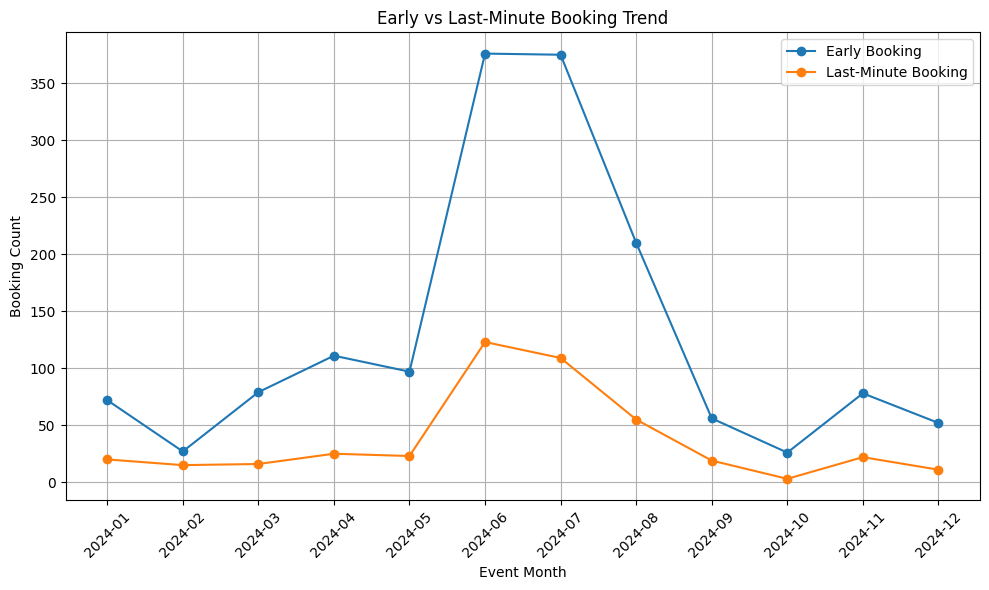

In [ ]:
import matplotlib.pyplot as plt
# Pivot for easier plotting
df_pivot = Trend_Early_last_bookings.pivot(index='Event_Month', columns='Booking_Type', values='Booking_Count')

# Plotting
plt.figure(figsize=(10,6))
plt.plot(df_pivot.index, df_pivot['Early Booking'], marker='o', label='Early Booking')
plt.plot(df_pivot.index, df_pivot['Last-Minute Booking'], marker='o', label='Last-Minute Booking')

plt.title('Early vs Last-Minute Booking Trend')
plt.xlabel('Event Month')
plt.ylabel('Booking Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**The trend showing the same pattern between early and last minute booking with peak on Summer  mainly on May, June**

### 📍 Location Insights

#### Most Popular City for Events (City with the highest number of ticket sales)


In [ ]:
# Most Popular City for Events
Most_Popular_City_for_Events = pd.read_sql_query(
"""
with monetary as (
SELECT
Venue.Venue_City,
SUM(Bookings.Ticket_Price_Pounds) AS Total_Sales_Pounds
FROM Bookings
LEFT JOIN Event
ON Bookings.Event_ID = Event.Event_ID
LEFT JOIN Venue
ON Event.Venue_ID = Venue.Venue_ID
GROUP BY Venue.Venue_City
ORDER BY 2 DESC


),

frequency as (
SELECT
Venue.Venue_City,
COUNT(Event.Event_ID) AS Number_of_Events
FROM Venue
LEFT JOIN Event
ON Venue.Venue_ID = Event.Venue_ID
GROUP BY Venue.Venue_City
ORDER BY 2 DESC


)

SELECT
monetary.Venue_City,
monetary.Total_Sales_Pounds,
frequency.Number_of_Events
FROM monetary
LEFT JOIN frequency
ON monetary.Venue_City = frequency.Venue_City
 Limit 10
""", conn)

#What should the output be.
Most_Popular_City_for_Events


,Venue_City,Total_Sales_Pounds,Number_of_Events
0,London,52596.20,16
1,Manchester,43154.90,13
2,Oxford,40048.17,12
3,Truro,25824.40,8
4,Canterbury,24890.03,4
5,Birmingham,19874.47,8
6,Nottingham,19823.42,7
7,Stoke-on-Trent,13385.81,4
8,Glasgow,12802.33,6
9,Cardiff,11677.84,4


**London is the city who generates highest sales and held number of events among other cities with 52596.20 and 16 events respectively**

#### City with the Most Repeat Customers(Location where buyers return for multiple events)


In [ ]:
# Most Popular City for Events
Location_where_buyers_return_for_multiple_events = pd.read_sql_query(
"""
SELECT
Venue.Venue_City,
Count(Bookings.Booking_ID) AS Total_Buyers
FROM Bookings
LEFT JOIN Event
ON Bookings.Event_ID = Event.Event_ID
LEFT JOIN Venue
ON Event.Venue_ID = Venue.Venue_ID
WHERE Bookings.User_ID IN (
    SELECT User_ID
    FROM Bookings
    GROUP BY User_ID
    HAVING COUNT(Booking_ID) > 1
)
GROUP BY Venue.Venue_City
ORDER BY 2 DESC
LIMIT 10
""", conn)

#What should the output be.

Location_where_buyers_return_for_multiple_events

,Venue_City,Total_Buyers
0,London,310
1,Manchester,256
2,Oxford,227
3,Truro,157
4,Canterbury,143
5,Nottingham,120
6,Birmingham,115
7,Glasgow,81
8,Stoke-on-Trent,72
9,Cardiff,66


**London has the highest number of repeat customers with 310, followed by Manchester and Oxford with 256 and 227 respectively, indicating strong customer loyalty and engagement concentrated in these key cities.**

### 👥 Demographic Insights

#### Most Active Age Group (Age group that books the most tickets)


In [ ]:
# Age group that books the most tickets
Most_Active_Age_Group= pd.read_sql_query(
"""
with user_age as (
SELECT
  User.User_ID,
  User.User_name,
  User.First_Name,
  User.Last_Name,
  STRFTIME('%Y', 'now'),
  User.Date_Of_Birth,
  CAST((JULIANDAY('now') - JULIANDAY(SUBSTR(Date_Of_Birth, 7, 4) || '-' ||
                                          SUBSTR(Date_Of_Birth, 4, 2) || '-' ||
                                          SUBSTR(Date_Of_Birth, 1, 2))) / 365.25 AS INTEGER) AS Age
FROM User
)

SELECT
CASE
WHEN Age >= 18 AND Age < 25 THEN '18-25'
WHEN Age >= 25 AND Age <= 35 THEN '25-35'
ELSE "35+"
END AS Age_Group,
COUNT(Bookings.Booking_ID) AS Number_of_Bookings
FROM user_age
LEFT JOIN Bookings
ON user_age.User_ID = Bookings.User_ID
GROUP BY Age_Group
ORDER BY Number_of_Bookings DESC

""", conn)

#What should the output be

Most_Active_Age_Group

,Age_Group,Number_of_Bookings
0,35+,931
1,25-35,609
2,18-25,460


**The 35+ age group has the highest number of bookings, followed by the 25-35 and 18-25 groups, indicating that older demographics are frequent attending some events in the platform.**

#### Highest Spending Age Group (Age group generating the most revenue)




In [ ]:
# Age group generating the most revenue
Age_group_generating_the_most_revenue= pd.read_sql_query(
"""
with user_age as (
SELECT
  User.User_ID,
  User.User_name,
  User.First_Name,
  User.Last_Name,
  STRFTIME('%Y', 'now'),
  User.Date_Of_Birth,
  CAST((JULIANDAY('now') - JULIANDAY(SUBSTR(Date_Of_Birth, 7, 4) || '-' ||
                                          SUBSTR(Date_Of_Birth, 4, 2) || '-' ||
                                          SUBSTR(Date_Of_Birth, 1, 2))) / 365.25 AS INTEGER) AS Age
FROM User
)

SELECT
CASE
WHEN Age >= 18 AND Age < 25 THEN '18-25'
WHEN Age >= 25 AND Age <= 35 THEN '25-35'
ELSE "35+"
END AS Age_Group,
SUM(Bookings.Ticket_Price_Pounds) AS Total_Spent_Pounds
FROM user_age
LEFT JOIN Bookings
ON user_age.User_ID = Bookings.User_ID
GROUP BY Age_Group
ORDER BY Total_Spent_Pounds DESC

""", conn)

#What should the output be.

Age_group_generating_the_most_revenue

,Age_Group,Total_Spent_Pounds
0,35+,151569.62
1,25-35,98004.14
2,18-25,76604.55


**The 35+ age group has the highest total sales, followed by the 25-35 and 18-25 groups, indicating that older demographics are driving the majority of ticket sales.**

#### Most Engaged Customers (Customers with the highest number of bookings.)


In [ ]:
# Customers with the highest number of bookings
Customers_with_the_highest_number_of_bookings=  pd.read_sql_query(
"""
SELECT
  User.User_ID,
  User.User_name,
  User.First_Name,
  User.Last_Name,
COUNT(Bookings.Booking_ID) AS Number_of_Bookings
FROM User
LEFT JOIN Bookings
ON User.User_ID = Bookings.User_ID
GROUP BY 1,2,3,4
ORDER BY Number_of_Bookings DESC
LIMIT 5

""", conn)

#What should the output be

Customers_with_the_highest_number_of_bookings

,User_ID,User_name,First_Name,Last_Name,Number_of_Bookings
0,U18052970,msancroft3n,Mervin,Sancroft,17
1,U52192930,ebowlandsct,Ellie,Bowlands,15
2,U79557329,acodnerae,Ana,Codner,12
3,U08777297,mgockelen38,Melisa,Gockelen,11
4,U19532952,swhorltondi,Silvanus,Whorlton,11


**Mervin Sancroft has the highest number of booking in our platforms with 17 followed by Ellie Bowlands and Ana Codner with 15 and 12 bookings respectively**

### ⏳ Timings & Trends

#### Best Day for Ticket Sales (Most popular day of the week for bookings)



In [ ]:
# Most popular day of the week for bookings
Most_popular_day_of_the_week_for_bookings=  pd.read_sql_query(
"""
SELECT
    CASE strftime('%w', datetime(substr(Booking_Date, 7, 4) || '-' ||
                                 substr(Booking_Date, 4, 2) || '-' ||
                                 substr(Booking_Date, 1, 2) || ' ' ||
                                 substr(Booking_Date, 12, 8)))
        WHEN '0' THEN 'Sunday'
        WHEN '1' THEN 'Monday'
        WHEN '2' THEN 'Tuesday'
        WHEN '3' THEN 'Wednesday'
        WHEN '4' THEN 'Thursday'
        WHEN '5' THEN 'Friday'
        WHEN '6' THEN 'Saturday'
    END AS Day_Name,
    COUNT(Bookings.Booking_ID) AS Number_of_Bookings
FROM Bookings
GROUP BY Day_Name
ORDER BY
    CASE Day_Name
        WHEN 'Monday' THEN 1
        WHEN 'Tuesday' THEN 2
        WHEN 'Wednesday' THEN 3
        WHEN 'Thursday' THEN 4
        WHEN 'Friday' THEN 5
        WHEN 'Saturday' THEN 6
        WHEN 'Sunday' THEN 7
    END;


""", conn)

#What should the output be

Most_popular_day_of_the_week_for_bookings

,Day_Name,Number_of_Bookings
0,Monday,304
1,Tuesday,307
2,Wednesday,256
3,Thursday,287
4,Friday,293
5,Saturday,281
6,Sunday,272


**The distribution of each day of week for ticket bookings are almost same, however, User tends to buy it on Monday or Tuesday**

#### Best Time to Release Tickets (Most common time of day for purchases)


In [ ]:
# Most common time of day for purchases
Most_common_time_of_day_for_purchases=  pd.read_sql_query(
"""
SELECT
    CASE
        WHEN CAST(substr(Booking_Date, 12, 2) AS INTEGER) BETWEEN 6 AND 8 THEN '06:00 - 09:00'
        WHEN CAST(substr(Booking_Date, 12, 2) AS INTEGER) BETWEEN 9 AND 11 THEN '09:00 - 12:00'
        WHEN CAST(substr(Booking_Date, 12, 2) AS INTEGER) BETWEEN 13 AND 14 THEN '13:00 - 15:00'
        WHEN CAST(substr(Booking_Date, 12, 2) AS INTEGER) BETWEEN 15 AND 17 THEN '15:00 - 18:00'
        WHEN CAST(substr(Booking_Date, 12, 2) AS INTEGER) BETWEEN 18 AND 20 THEN '18:00 - 21:00'
        WHEN CAST(substr(Booking_Date, 12, 2) AS INTEGER) BETWEEN 21 AND 23 THEN '21:00 - 00:00'
        ELSE '00:00 - 06:00'
    END AS Time_Slot,

    COUNT(Bookings.Booking_ID) AS Number_of_Bookings

FROM Bookings
GROUP BY Time_Slot
ORDER BY
    CASE Time_Slot
        WHEN '06:00 - 09:00' THEN 1
        WHEN '09:00 - 12:00' THEN 2
        WHEN '13:00 - 15:00' THEN 3
        WHEN '15:00 - 18:00' THEN 4
        WHEN '18:00 - 21:00' THEN 5
        WHEN '21:00 - 00:00' THEN 6
        WHEN '00:00 - 06:00' THEN 7
    END;

""", conn)

#What should the output be

Most_common_time_of_day_for_purchases

,Time_Slot,Number_of_Bookings
0,06:00 - 09:00,271
1,09:00 - 12:00,245
2,13:00 - 15:00,144
3,15:00 - 18:00,255
4,18:00 - 21:00,271
5,21:00 - 00:00,262
6,00:00 - 06:00,552


**Most User did a booking when midnight time around 00:00 and 06:00 with 552 bookings**

####  Event Timing Preference (Daytime vs. evening event popularity)



In [ ]:
# Daytime vs. evening event popularity
# 6-17= Daytime, else 17-6 evening
Event_Timing_Preference=  pd.read_sql_query(
"""
SELECT
    CASE
        WHEN CAST(substr(Event_Date, 12, 2) AS INTEGER) BETWEEN 6 AND 17 THEN 'Daytime'
        ELSE 'Evening'
    END AS Event_Time,
     COUNT(Bookings.Booking_ID) AS Number_of_Bookings

FROM Event
LEFT JOIN Bookings
ON Event.Event_ID = Bookings.Event_ID
GROUP BY Event_Time
ORDER BY 2 desc
""", conn)

#What should the output be

Event_Timing_Preference

,Event_Time,Number_of_Bookings
0,Evening,1411
1,Daytime,589


**Event that held during Evening time are more popular than daytime event with 14411 bookings**

### 💳 Payment Insights

##### Most Used Payment Method (Most commonly used payment option )



In [ ]:
# Most Used Payment Method
Most_Used_Payment_Method=  pd.read_sql_query(
"""
SELECT
Payment_Method_Type.Payment_Method_Name,
COUNT(Bookings.Booking_ID) AS Number_of_Bookings
FROM Bookings
LEFT JOIN Payment_Method_Type
ON Bookings.Payment_Method_ID = Payment_Method_Type.Payment_Method_ID
GROUP BY 1
ORDER BY 2 desc

""", conn)

#What should the output be.
Most_Used_Payment_Method

,Payment_Method_Name,Number_of_Bookings
0,credit card,1244
1,Coupon,355
2,EMI,167
3,net banking,120
4,pay later,114


**Most users tend to pay the ticket or the booking by using  credit card with 1244 bookings**

:#### Transaction Trends (Payment methods used for purchasing ticket.)

In [ ]:
#Payment Method Trends

Payment_Method_Trend = pd.read_sql_query(
"""

with data as (
SELECT
    strftime('%Y-%m', date(substr(Booking_Date, 7, 4) || '-' ||
                           substr(Booking_Date, 4, 2) || '-' ||
                           substr(Booking_Date, 1, 2))) AS Booking_Month,

    Payment_Method_Type.Payment_Method_Name as  Payment_Method_Type  ,
    COUNT(*) AS Number_of_Bookings
FROM Bookings
LEFT JOIN Payment_Method_Type
ON Bookings.Payment_Method_ID = Payment_Method_Type.Payment_Method_ID
GROUP BY Booking_Month, Payment_Method_Type.Payment_Method_Name
ORDER BY Booking_Month,Payment_Method_Type.Payment_Method_Name ASC

),

data_1 as (
 SELECT
 *,
LAG(Number_of_Bookings) OVER(PARTITION BY Payment_Method_Type  ORDER BY Booking_Month ASC) as LAG_Previous_Month_Booking
FROM data
)

SELECT
*,
ROUND( (1.0 * (Number_of_Bookings - LAG_Previous_Month_Booking) / NULLIF(LAG_Previous_Month_Booking, 0)) * 100, 2) AS Growth_Rate
FROM data_1


""", conn)

#What should the output be.
pd.set_option('display.max_rows', None)
Payment_Method_Trend


,Booking_Month,Payment_Method_Type,Number_of_Bookings,LAG_Previous_Month_Booking,Growth_Rate
0,2023-12,Coupon,7,NaN,NaN
1,2024-01,Coupon,11,7.0,57.14
2,2024-02,Coupon,18,11.0,63.64
3,2024-03,Coupon,18,18.0,0.00
4,2024-04,Coupon,27,18.0,50.00
5,2024-05,Coupon,47,27.0,74.07
6,2024-06,Coupon,83,47.0,76.60
7,2024-07,Coupon,71,83.0,-14.46
8,2024-08,Coupon,31,71.0,-56.34
9,2024-09,Coupon,12,31.0,-61.29


**All the payment methods have similar pattern of trend, bookings made by using credit card are comparitively more compared to the other payment methods**

### ⭐ Customer Satisfaction

#### Event with the Best Ratings (Event receiving the highest customer feedback )


In [ ]:
#Event with the Best Ratings (Event receiving the highest customer feedback )
Event_with_the_Best_Ratings = pd.read_sql_query(
"""
SELECT
Event.Event_ID,
Event.Event_Name,
ROUND(AVG(Rating.Event_Rating),0) AS Average_Rating
FROM
Rating
LEFT JOIN Bookings
ON Rating.Booking_ID = Bookings.Booking_ID
LEFT JOIN Event
ON Bookings.Event_ID = Event.Event_ID
Group by 1,2
ORDER BY Average_Rating DESC
LIMIT 10

""", conn)

#What should the output be
Event_with_the_Best_Ratings

,Event_ID,Event_Name,Average_Rating
0,E035,Beethoven & Bach Live,5.0
1,E099,The Ultimate Punk Rock Fest,5.0
2,E100,Iconic Film & TV Soundtracks Live,5.0
3,E101,The Golden Harp Concert,5.0
4,E002,Symphony Under the Stars,4.0
5,E004,Electric Groove Jam,4.0
6,E005,Country Roots Revival,4.0
7,E006,Hip-Hop Hype Night,4.0
8,E007,Indie Vibes Extravaganza,4.0
9,E008,Jazz Fusion Showcase,4.0


**Beethoven & Bach Live, The Ultimate Pock Rocke Fest ,Icone Film  & TV Soundtracks Live have perfect 5 rating compared to other events**

#### Venues with the Most Complaints (Venues with the most negative reviews)


In [ ]:
#Venues with the Most Complaints
Bad_Venue = pd.read_sql_query(
"""
SELECT
Venue.Venue_ID,
Venue.Venue_Name,
ROUND(AVG(Rating.Venue_Rating),0) AS Average_Rating
FROM
Rating
LEFT JOIN Bookings
ON Rating.Booking_ID = Bookings.Booking_ID
LEFT JOIN Event
ON Bookings.Event_ID = Event.Event_ID
LEFT JOIN Venue
ON Event.Venue_ID = Venue.Venue_ID
Group by 1,2
ORDER BY Average_Rating ASC
LIMIT 10

""", conn)

#What should the output be
Bad_Venue

,Venue_ID,Venue_Name,Average_Rating
0,V002,Wembley Stadium,3.0
1,V009,The Royal Albert Hall,3.0
2,V018,The Usher Hall,3.0
3,V020,Bournemouth International Centre,3.0
4,V022,The Liverpool Empire Theatre,3.0
5,V025,Bristol Hippodrome,3.0
6,V029,The Swansea Grand Theatre,3.0
7,V030,Milton Keynes Theatre,3.0
8,V031,The Lyceum Theatre,3.0
9,V032,The Cliffs Pavilion,3.0


**Venues with poor reviews, where the average rating is 3, tend to be large, well-known theaters and stadiums, indicating that despite their popularity, they may struggle to consistently meet customer expectations.**

#### Repeat Customers’ Preferences (Types of events most preferred by returning customers)


In [ ]:
#Repeat Customers’ Preferences
# Event Genre prefrences by user who purchase more than one booking
Repeat_Customers_Preferences = pd.read_sql_query(
"""
SELECT
    Genre.Genre_ID,
    Genre.Genre_Name,
    COUNT(Bookings.Booking_ID) AS Total_Bookings
FROM Bookings
LEFT JOIN Event
ON Bookings.Event_ID = Event.Event_ID
LEFT JOIN Genre
ON Event.Genre_ID = Genre.Genre_ID
WHERE Bookings.User_ID IN (
    SELECT User_ID
    FROM Bookings
    GROUP BY User_ID
    HAVING COUNT(Booking_ID) > 1
)
GROUP BY 1,2
ORDER BY 3 DESC
LIMIT 5


""", conn)

#What should the output be
Repeat_Customers_Preferences

,Genre_ID,Genre_Name,Total_Bookings
0,G002,Classical,205
1,G003,Country,202
2,G007,Indie,189
3,G001,Blues,184
4,G009,Pop,172


**Classical genre has the highest number of repeat customers with 205, followed by Country and Indie with 202 and 189 respectively, indicating strong customer loyalty and engagement concentrated in these key genres**

### Summary

#### recap




Most Popular Performers (Artist with the highest ticket sales)
Woodie Brenyonn has most sales perfomer in our platform with 9939 pounds


Highest-Rated Performer (Performer with the best customer reviews)
Overall the performers got high rating, mainly Cinda Bjorkan, Berte Lawtie have a perfect rating


Performer_Type/category with the Most Events
The distribution of Number of Events for the performer type are almost same, but Dancer has the most number of events


Most Booked Venue (Venue hosting the most events)
Manchester Arena held the most events compared to the other venues




Best-Rated Venue (Venue with the highest customer ratings)


In average most of the venues got 3 rating, however The Royal Concert Hall and Leeds Grand Theatre has 4.33 and 4.00 rating from user






Largest vs. Smallest Venues (Venues with the highest and lowest capacities)


The average capacity of the venue within the platform is 8937
The venue mostly are Small venues ( < 8937) with 27 , however the distribution number of venues are similar between small and large venues

The Small venues slightly generates more sales and held more events compare to large venues




Which location has small and big venue?
London has many big venues (> 8397 capacity)


Oxford and Truro has many small venues (< 8397 capacity)




Highest Revenue-Generating Genre (Genre bringing in the most ticket revenue)
The event who has Classical genre generates highest sales with 36226.14


Genre with the Most Customers (Genre attracting the most buyers)
The event who has Classical genre also highest repeated bookings with 214




Most popular ticket type


Many user bought General type of ticket for overall event in the platform wih 991 tickets


Most Booked Event (Event with the highest number of bookings)
Mozart & Chopin Evening has the highest number of bookings among the other followed by Western Rodeo Music Fest with number of bookings are 59 and 52 respectively



Event with the Highest Revenue (Event generating the most ticket sales)
Mozart & Chopin Evening has the highest number of bookings among the other followed by Western Rodeo Music Fest with number of bookings are 59 and 52 respectively


Peak Booking Periods (Months or seasons with the highest ticket sales) and growth trend


The peak booking period is on summer mainly around summer and early winter time which around June, July and November

There are significant increase on April and May with 71% and 105% respectively, also in November with 147.83 %



Early vs. Last-Minute Bookings (Booking trends for early vs. last-minute buyers)

The trend showing the same pattern between early and last minute booking with peak on Summer mainly on May, June




Most Popular City for Events (City with the highest number of ticket sales)

London is the city who generates highest sales and held number of events among other cities with 52596.20 and 16 events respectively

London has the highest number of repeat customers with 310, followed by Manchester and Oxford with 256 and 227 respectively, indicating strong customer loyalty and engagement concentrated in these key cities.




Most Active Age Group (Age group that books the most tickets)
The 35+ age group has the highest number of bookings, followed by the 25-35 and 18-25 groups, indicating that older demographics are frequent attending some events in the platform.
Highest Spending Age Group (Age group generating the most revenue)

The 35+ age group has the highest total sales, followed by the 25-35 and 18-25 groups, indicating that older demographics are driving the majority of ticket sales.

Most Engaged Customers (Customers with the highest number of bookings.)
Mervin Sancroft has the highest number of booking in our platforms with 17 followed by Ellie Bowlands and Ana Codner with 15 and 12 bookings respectively

Best Day for Ticket Sales (Most popular day of the week for bookings)
The distribution of each day of week for ticket bookings are almost same, however, User tends to buy it on Monday or Tuesday

Most User did a booking when midnight time around 00:00 and 06:00 with 552 bookings


Event Timing Preference (Daytime vs. evening event popularity)
Event that held during Evening time are more popular than daytime event with 14411 bookings


Most Used Payment Method (Most commonly used payment option )

Most users tend to pay the ticket or the booking by using credit card with 1244 bookings


All the payment methods have similar pattern of trend, bookings made by using credit card are comparitively more compared to the other payment methods

Event with the Best Ratings (Event receiving the highest customer feedback )
Beethoven & Bach Live, The Ultimate Pock Rocke Fest ,Icone Film & TV Soundtracks Live have perfect 5 rating compared to other events



Venues with the Most Complaints (Venues with the most negative reviews)

Venues with poor reviews, where the average rating is 3, tend to be large, well-known theaters and stadiums, indicating that despite their popularity, they may struggle to consistently meet customer expectations.



Classical genre has the highest number of repeat customers with 205, followed by Country and Indie with 202 and 189 respectively, indicating strong customer loyalty and engagement concentrated in these key genres

Total event based on month time  : Mostly event were held during summer time around June, July and August

#### Conclusion

The platform shows strong engagement from the older age group audience (35+), who are not only the most active bookers but also the highest spenders, especially for Classic events, with dance performer which are also the most important market and generating the highest sales and repeat customer base as well as London in terms of venue locations

Customer behavior highlights a preference for evening events, early week bookings, and a tendency to book during the late night to early morning hours. While small and large venues do not differ significantly in terms of numbers, small venues with a capacity of less than 8,937 outperform slightly in terms of sales and bookings. However, larger venues, despite their prestige, face a recurring customer satisfaction issue with lower average ratings than the other venues, with an average of 3 ratings.

Despite the diverse event offerings, most users prefer to buy General tickets and prefer credit card payments, including for VIP purchases. This is followed by the peak booking periods , which are the summer months and November, with a clear spike in booking growth from spring to early summer and early winter when many events were being held during those periods